In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor, DMatrix, cv
import matplotlib.pyplot as plt

# Load the CSV files
grid_search_results = pd.read_csv('dataset/0908_0_1_00_xgboost_evaluation_CV_GridSearch_IDO_XGBCV.csv')
random_search_results = pd.read_csv('dataset/0908_0_2_00_xgboost_evaluation_CV_RandomSearch_IDO_XGBCV.csv')

# Display the first few rows of each dataframe to understand their structure
grid_search_results.head(), random_search_results.head()

(   Test Size                             Method  \
 0       0.20  No Cross Validation (Grid Search)   
 1       0.25  No Cross Validation (Grid Search)   
 2       0.30  No Cross Validation (Grid Search)   
 3       0.35  No Cross Validation (Grid Search)   
 4       0.20               xgb.cv (Grid Search)   
 
                                          Best Params           Start Time  \
 0  {'colsample_bytree': 0.7, 'learning_rate': 0.1...  2024-06-04 19:22:49   
 1  {'colsample_bytree': 0.8, 'learning_rate': 0.1...  2024-06-04 19:23:32   
 2  {'colsample_bytree': 0.8, 'learning_rate': 0.1...  2024-06-04 19:24:12   
 3  {'colsample_bytree': 0.9, 'learning_rate': 0.1...  2024-06-04 19:24:54   
 4  {'colsample_bytree': 0.7, 'learning_rate': 0.1...  2024-06-04 19:22:49   
 
               End Time  Duration (s)       MAE       MSE      RMSE        R2  
 0  2024-06-04 19:23:30     40.920203  1.729272  6.241339  2.498267  0.654950  
 1  2024-06-04 19:24:10     38.414454  1.768956  6.44385

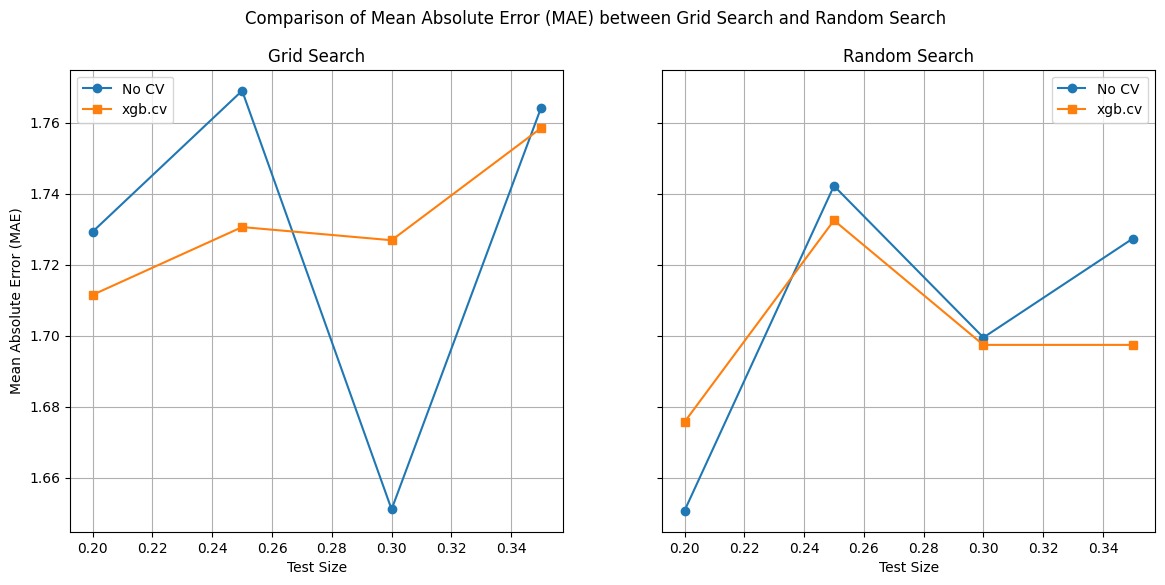

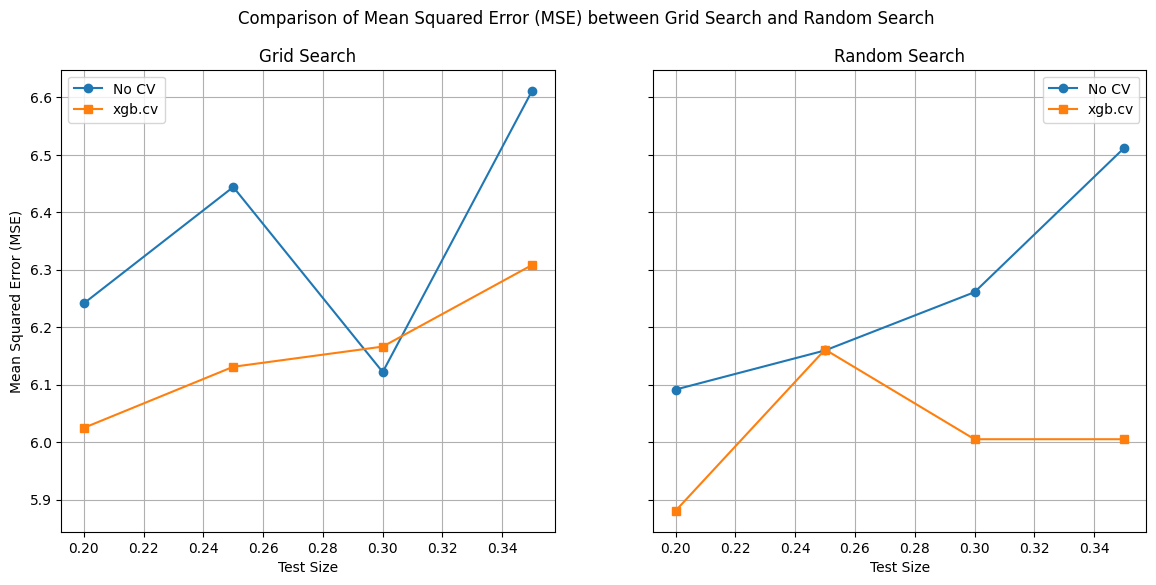

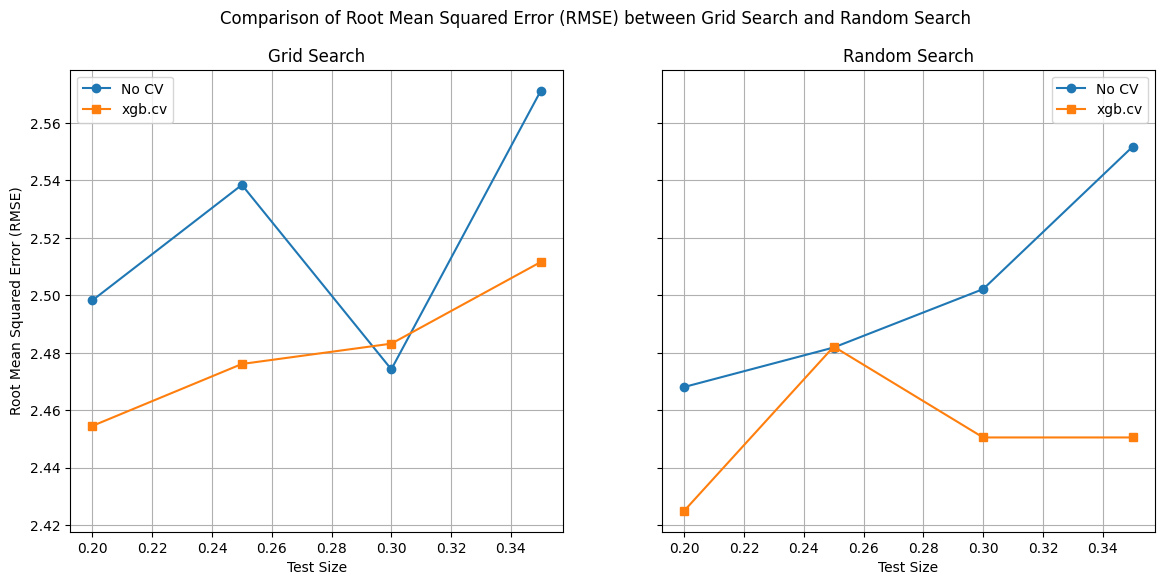

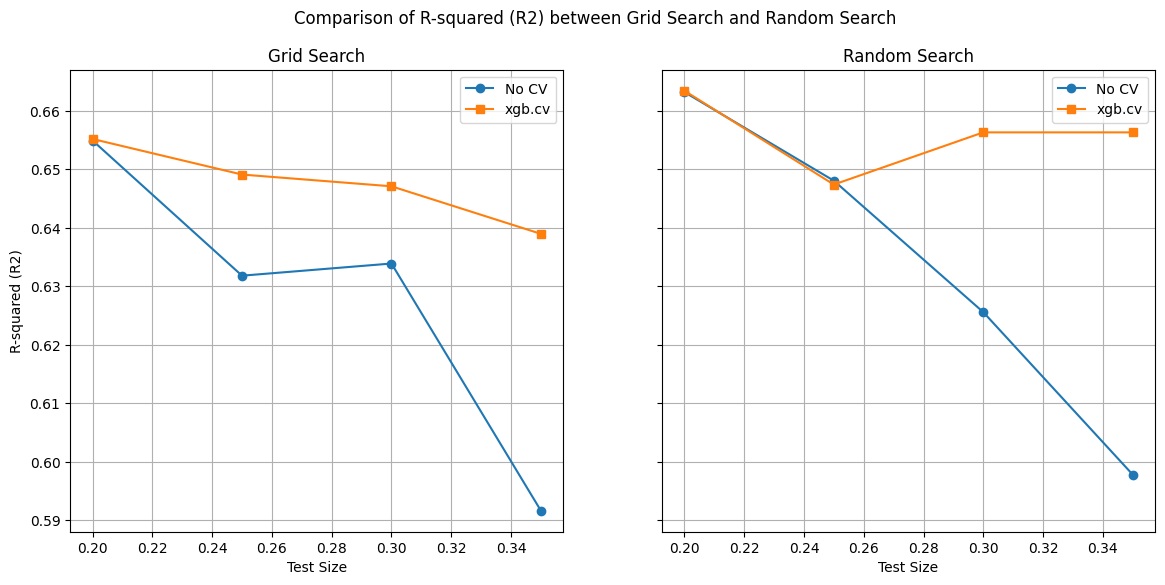

In [8]:


# Create a function to plot the comparisons
def plot_comparison(metric, ylabel):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Grid Search data
    grid_search_no_cv = grid_search_results[grid_search_results['Method'].str.contains('No Cross Validation')]
    grid_search_cv = grid_search_results[grid_search_results['Method'].str.contains('xgb.cv')]

    # Random Search data
    random_search_no_cv = random_search_results[random_search_results['Method'].str.contains('No Cross Validation')]
    random_search_cv = random_search_results[random_search_results['Method'].str.contains('xgb.cv')]

    # Plot Grid Search
    ax[0].plot(grid_search_no_cv['Test Size'], grid_search_no_cv[metric], label='No CV', marker='o')
    ax[0].plot(grid_search_cv['Test Size'], grid_search_cv[metric], label='xgb.cv', marker='s')
    ax[0].set_title('Grid Search')
    ax[0].set_xlabel('Test Size')
    ax[0].set_ylabel(ylabel)
    ax[0].legend()
    ax[0].grid(True)

    # Plot Random Search
    ax[1].plot(random_search_no_cv['Test Size'], random_search_no_cv[metric], label='No CV', marker='o')
    ax[1].plot(random_search_cv['Test Size'], random_search_cv[metric], label='xgb.cv', marker='s')
    ax[1].set_title('Random Search')
    ax[1].set_xlabel('Test Size')
    ax[1].legend()
    ax[1].grid(True)

    plt.suptitle(f'Comparison of {ylabel} between Grid Search and Random Search')
    plt.show()

# Plot comparisons for MAE, MSE, RMSE, and R2
plot_comparison('MAE', 'Mean Absolute Error (MAE)')
plot_comparison('MSE', 'Mean Squared Error (MSE)')
plot_comparison('RMSE', 'Root Mean Squared Error (RMSE)')
plot_comparison('R2', 'R-squared (R2)')

## Agreggate 

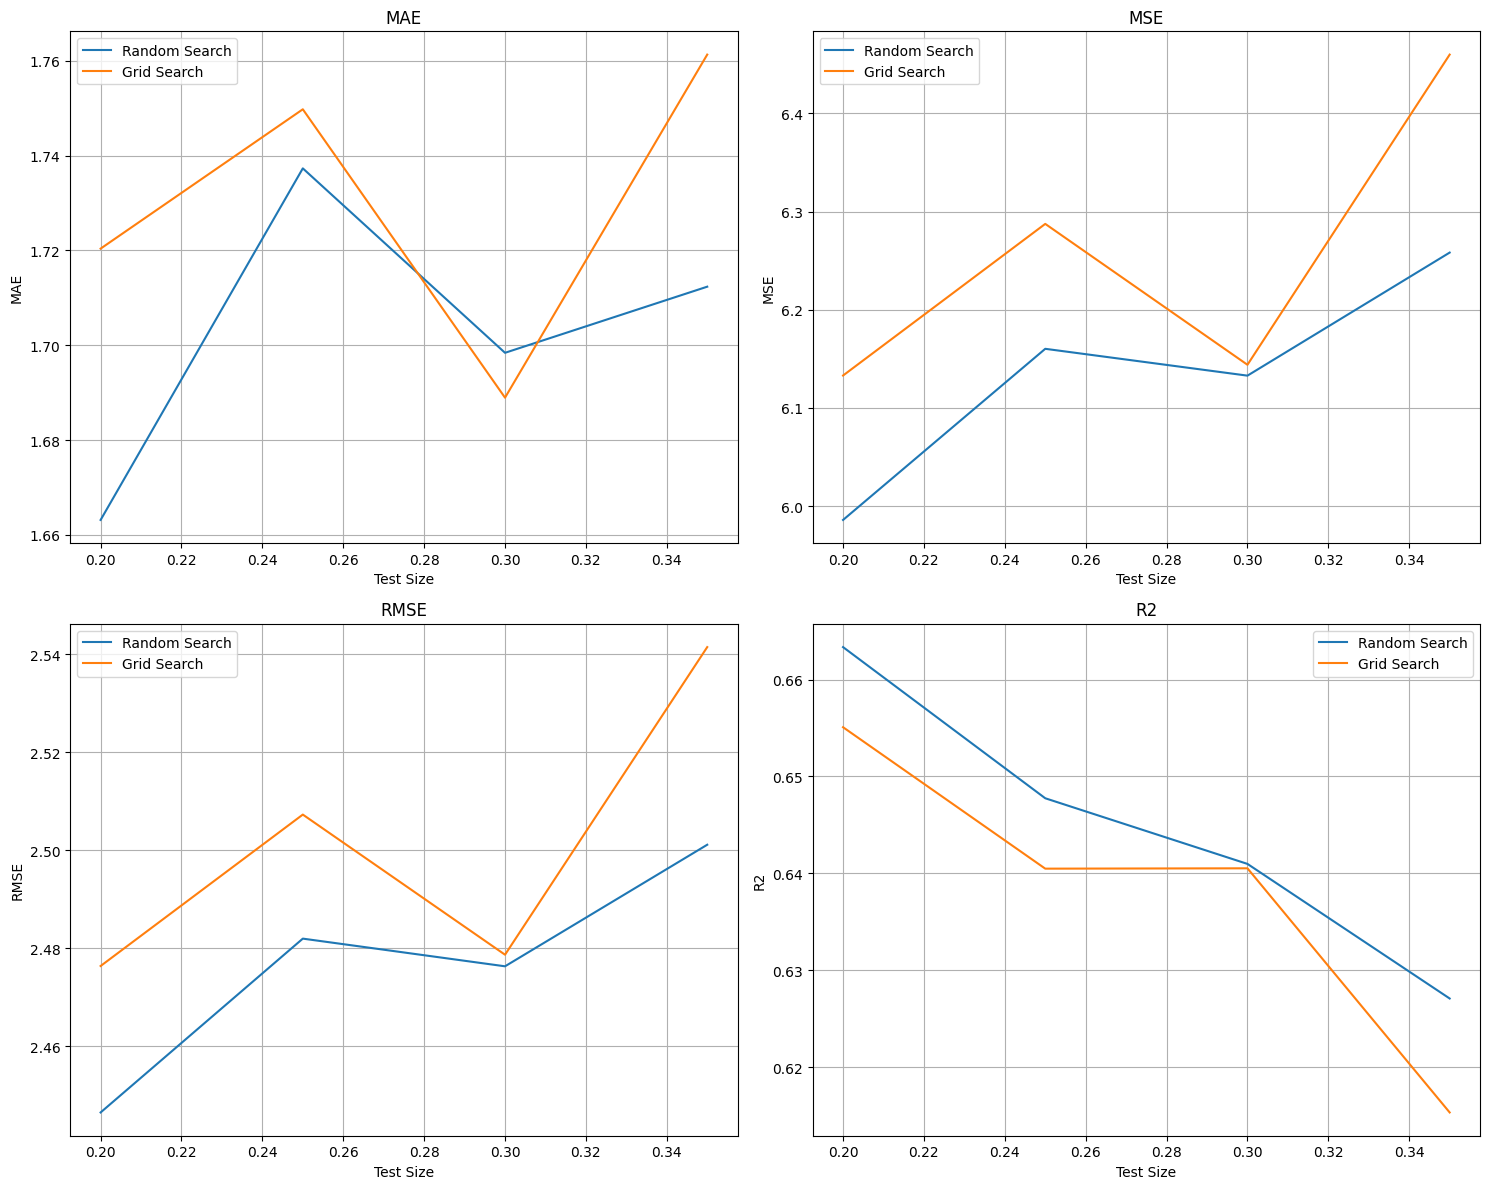

In [9]:
# Aggregate data for easier visualization
aggregate_data = pd.concat([
    random_search_df.assign(SearchMethod='Random Search'),
    grid_search_df.assign(SearchMethod='Grid Search')
])

# Aggregate by Test Size and Search Method for averaging
agg_metrics = aggregate_data.groupby(['Test Size', 'SearchMethod'])[metrics].mean().reset_index()

# Initialize figure and axes for aggregated visualization
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot each aggregated metric
for i, metric in enumerate(metrics):
    ax = axs[i//2, i%2]
    
    for search_method in search_methods:
        metric_values = agg_metrics[agg_metrics['SearchMethod'] == search_method][metric]
        test_sizes = agg_metrics[agg_metrics['SearchMethod'] == search_method]['Test Size']
        ax.plot(test_sizes, metric_values, label=search_method)
    
    ax.set_title(metric)
    ax.set_xlabel('Test Size')
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

# Adjust layout and display plot
plt.tight_layout()
plt.show()


In [11]:
# import matplotlib.pyplot as plt

# Function to create the plot
def plot_comparison(grid_search_results, random_search_results, metric, ylabel, title):
    plt.figure(figsize=(12, 8))
    
    test_sizes = grid_search_results['Test Size'].unique()
    no_cv_grid = grid_search_results[grid_search_results['Method'].str.contains("No Cross Validation")]
    xgb_cv_grid = grid_search_results[grid_search_results['Method'].str.contains("xgb.cv")]
    no_cv_random = random_search_results[random_search_results['Method'].str.contains("No Cross Validation")]
    xgb_cv_random = random_search_results[random_search_results['Method'].str.contains("xgb.cv")]
    
    plt.plot(test_sizes, no_cv_grid[metric], label='No CV (Grid Search)', marker='o')
    plt.plot(test_sizes, xgb_cv_grid[metric], label='xgb.cv (Grid Search)', marker='o')
    plt.plot(test_sizes, no_cv_random[metric], label='No CV (Random Search)', marker='o')
    plt.plot(test_sizes, xgb_cv_random[metric], label='xgb.cv (Random Search)', marker='o')
    
    # Annotate points with values
    for i in range(len(test_sizes)):
        plt.text(test_sizes[i], no_cv_grid[metric].iloc[i], f"{no_cv_grid[metric].iloc[i]:.4f}", ha='center', va='bottom')
        plt.text(test_sizes[i], xgb_cv_grid[metric].iloc[i], f"{xgb_cv_grid[metric].iloc[i]:.4f}", ha='center', va='bottom')
        plt.text(test_sizes[i], no_cv_random[metric].iloc[i], f"{no_cv_random[metric].iloc[i]:.4f}", ha='center', va='bottom')
        plt.text(test_sizes[i], xgb_cv_random[metric].iloc[i], f"{xgb_cv_random[metric].iloc[i]:.4f}", ha='center', va='bottom')
    
    plt.xlabel('Test Size')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

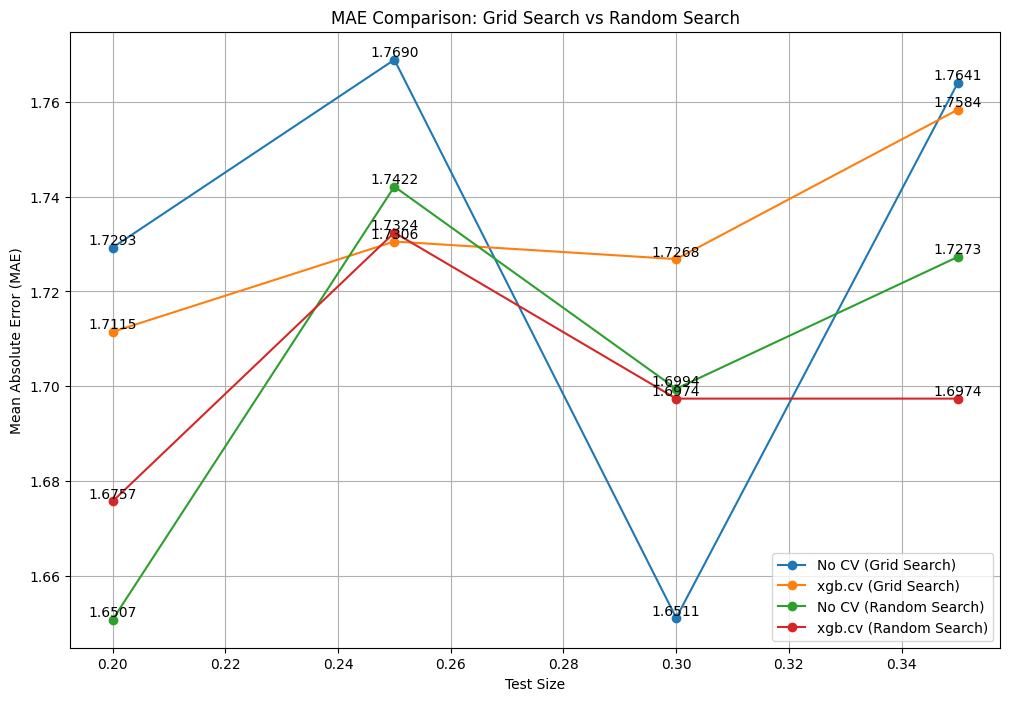

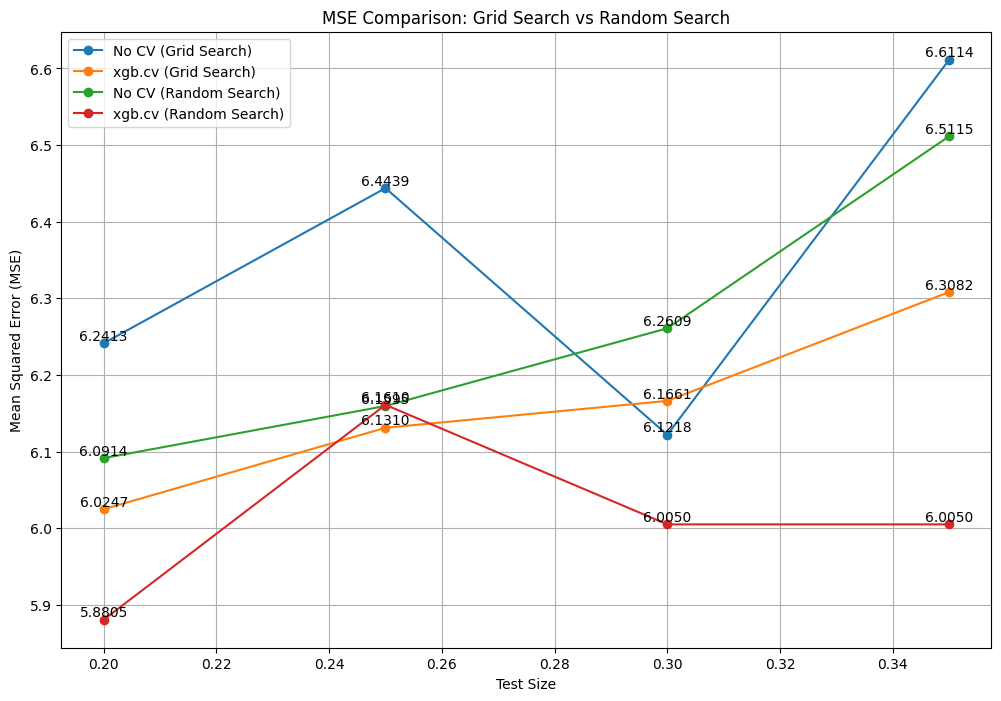

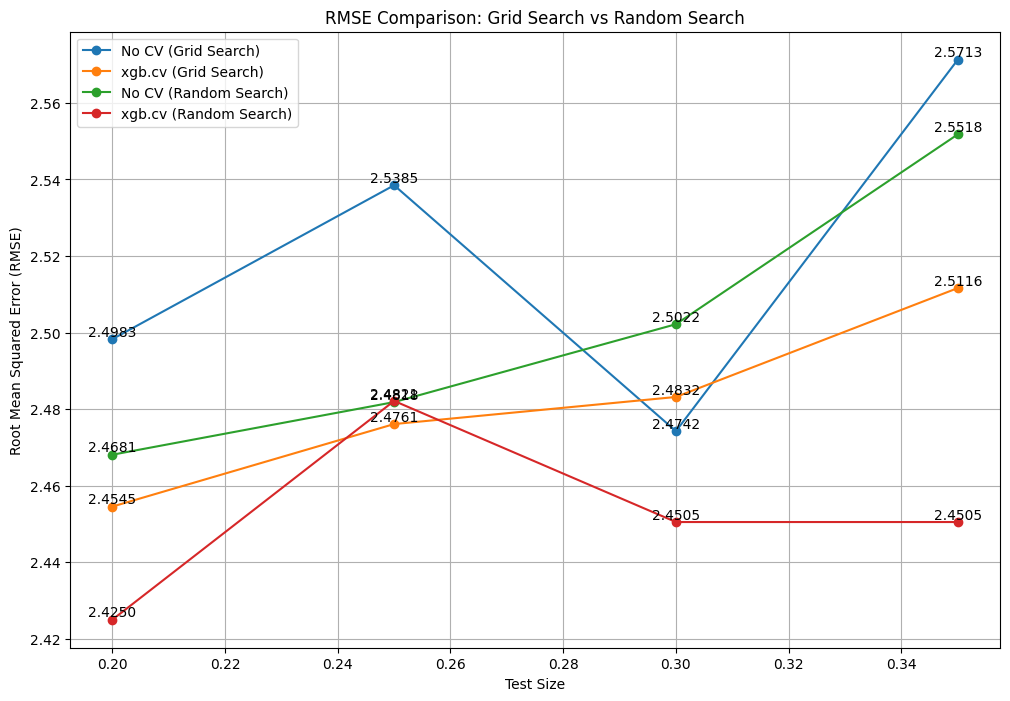

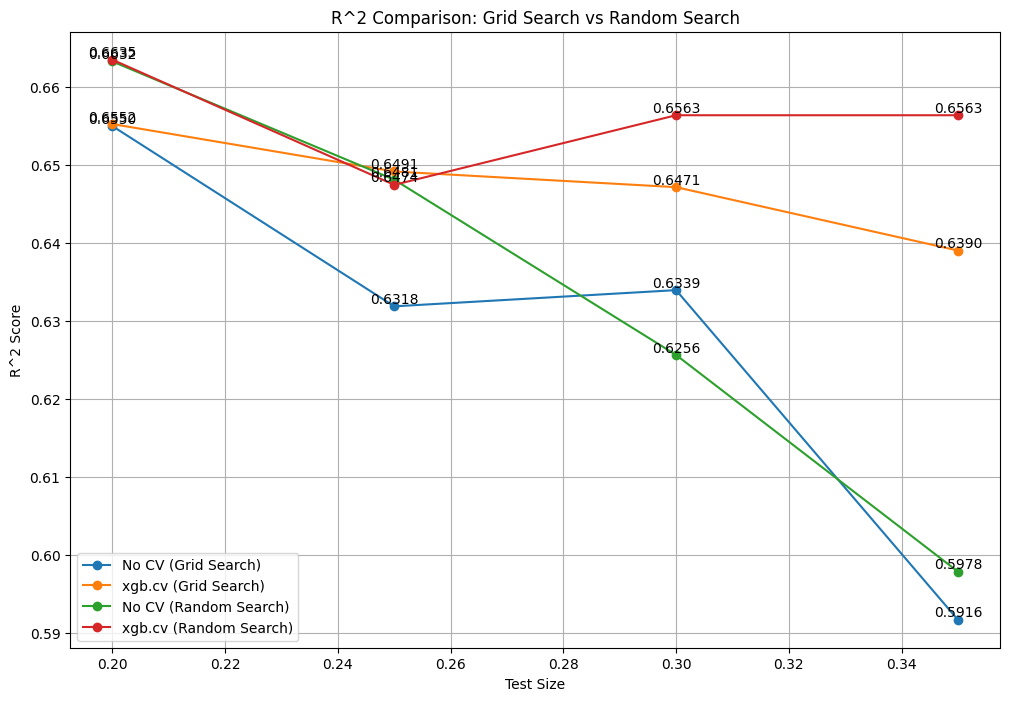

In [12]:

# Plotting MAE
plot_comparison(grid_search_results, random_search_results, 'MAE', 'Mean Absolute Error (MAE)', 'MAE Comparison: Grid Search vs Random Search')

# Plotting MSE
plot_comparison(grid_search_results, random_search_results, 'MSE', 'Mean Squared Error (MSE)', 'MSE Comparison: Grid Search vs Random Search')

# Plotting RMSE
plot_comparison(grid_search_results, random_search_results, 'RMSE', 'Root Mean Squared Error (RMSE)', 'RMSE Comparison: Grid Search vs Random Search')

# Plotting R2
plot_comparison(grid_search_results, random_search_results, 'R2', 'R^2 Score', 'R^2 Comparison: Grid Search vs Random Search')


In [13]:
# Function to create bar plots
def bar_plot_comparison(grid_search_results, random_search_results, metric, ylabel, title):
    test_sizes = grid_search_results['Test Size'].unique()
    no_cv_grid = grid_search_results[grid_search_results['Method'].str.contains("No Cross Validation")]
    xgb_cv_grid = grid_search_results[grid_search_results['Method'].str.contains("xgb.cv")]
    no_cv_random = random_search_results[random_search_results['Method'].str.contains("No Cross Validation")]
    xgb_cv_random = random_search_results[random_search_results['Method'].str.contains("xgb.cv")]

    labels = [f"Test Size {size}" for size in test_sizes]
    x = range(len(test_sizes))

    fig, ax = plt.subplots(figsize=(14, 8))

    bar_width = 0.2
    opacity = 0.8

    rects1 = plt.bar([p - 1.5 * bar_width for p in x], no_cv_grid[metric], bar_width,
    alpha=opacity, color='b', label='No CV (Grid Search)')

    rects2 = plt.bar([p - 0.5 * bar_width for p in x], xgb_cv_grid[metric], bar_width,
    alpha=opacity, color='g', label='xgb.cv (Grid Search)')

    rects3 = plt.bar([p + 0.5 * bar_width for p in x], no_cv_random[metric], bar_width,
    alpha=opacity, color='r', label='No CV (Random Search)')

    rects4 = plt.bar([p + 1.5 * bar_width for p in x], xgb_cv_random[metric], bar_width,
    alpha=opacity, color='y', label='xgb.cv (Random Search)')

    plt.xlabel('Test Size')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(x, labels)

    plt.legend()
    plt.tight_layout()
    
    # Add labels on top of bars
    def add_labels(rects):
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width() / 2.0, height,
                     f'{height:.4f}', ha='center', va='bottom')

    add_labels(rects1)
    add_labels(rects2)
    add_labels(rects3)
    add_labels(rects4)

    plt.show()


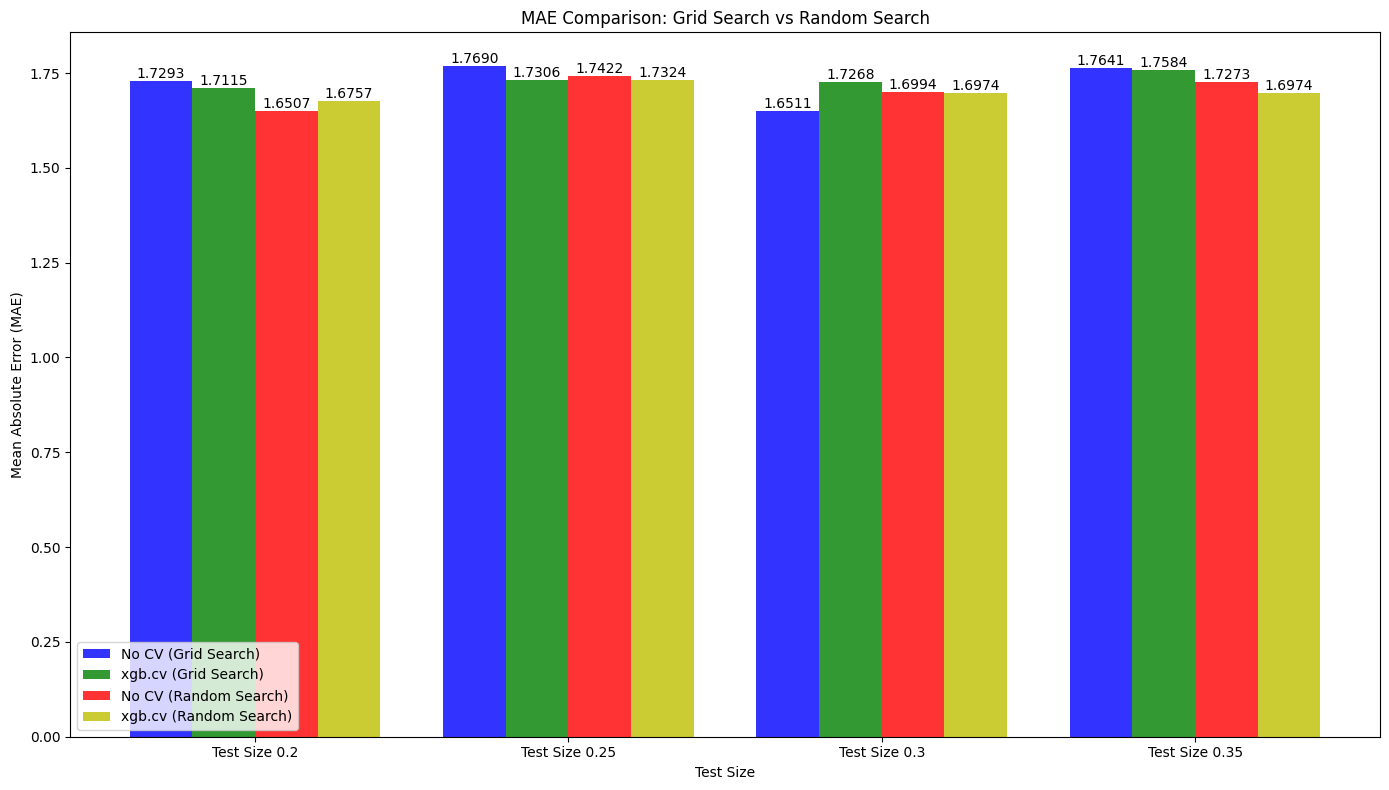

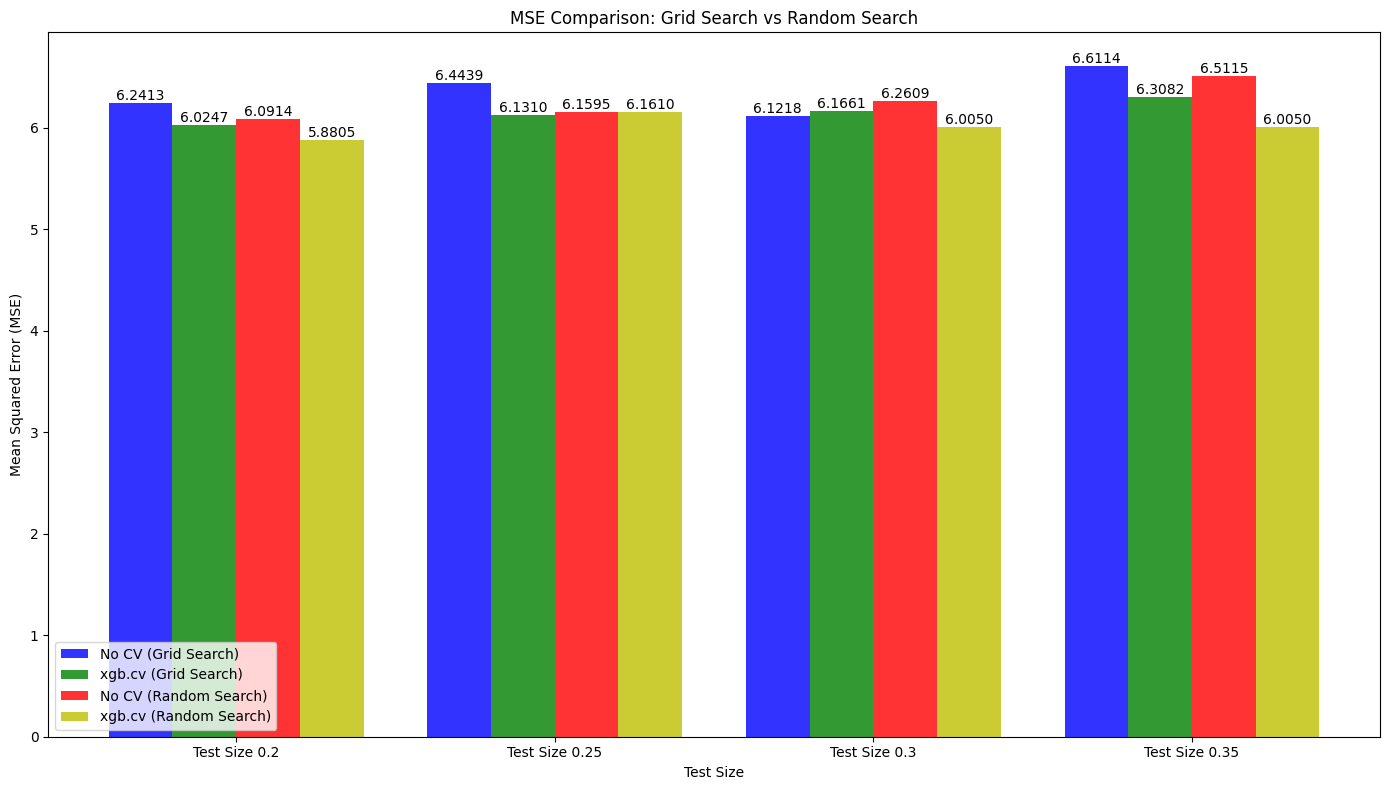

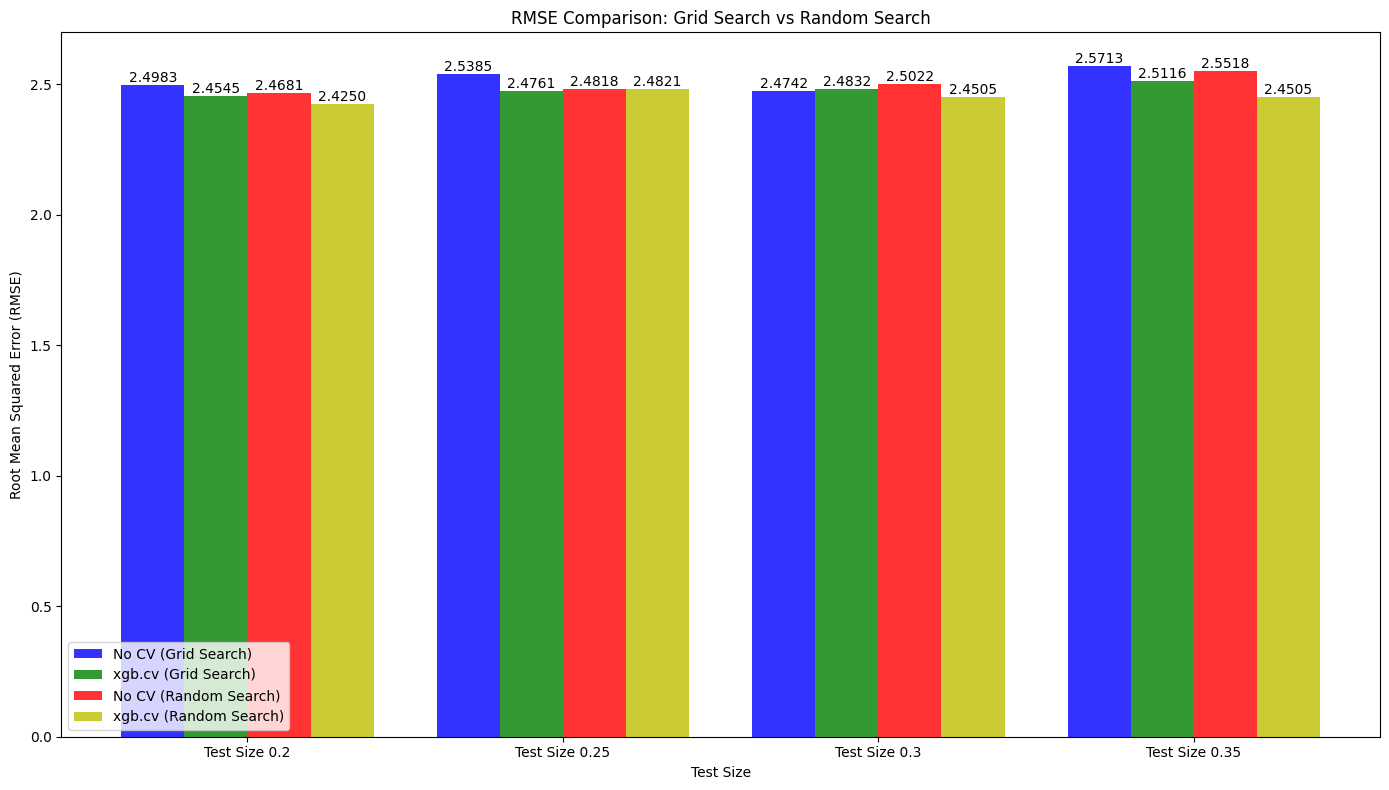

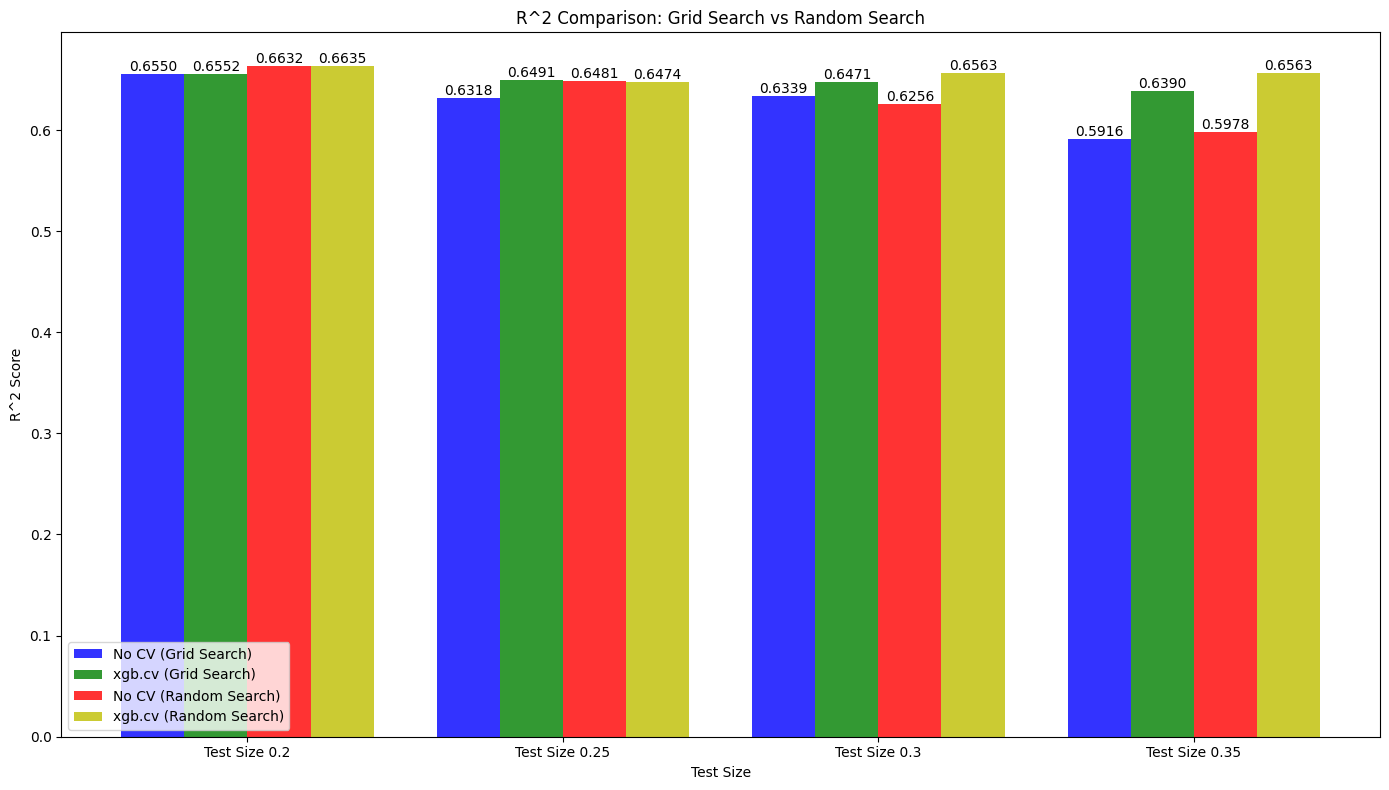

In [14]:

# Plotting MAE
bar_plot_comparison(grid_search_results, random_search_results, 'MAE', 'Mean Absolute Error (MAE)', 'MAE Comparison: Grid Search vs Random Search')

# Plotting MSE
bar_plot_comparison(grid_search_results, random_search_results, 'MSE', 'Mean Squared Error (MSE)', 'MSE Comparison: Grid Search vs Random Search')

# Plotting RMSE
bar_plot_comparison(grid_search_results, random_search_results, 'RMSE', 'Root Mean Squared Error (RMSE)', 'RMSE Comparison: Grid Search vs Random Search')

# Plotting R2
bar_plot_comparison(grid_search_results, random_search_results, 'R2', 'R^2 Score', 'R^2 Comparison: Grid Search vs Random Search')
